wqewe

### Импорт необходимых библиотек

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

RANDOM_STATE для повторяемости результатов

In [2]:
RANDOM_STATE = 3128

Загрузка исходных данных из файла X_bp

In [5]:
X_bp = pd.read_excel('X_bp.xlsx', index_col=0)
X_bp.shape

(1023, 10)

Загрузка исходных данных из файла X_nup

In [10]:
X_nup = pd.read_excel('X_nup.xlsx', index_col=0)
X_nup.shape

(1040, 3)

X_bp содержит индекс + 10 признаков и 1023 строк.

X_nup содержит индекс + 3 признака и 1040 строк

Список признаков:

In [7]:
pd.DataFrame(X_bp.columns, columns=['X_bp признаки'])

X_bp признаки
0       Соотношение матрица-наполнитель
1                      Плотность, кг/м3
2                 модуль упругости, ГПа
3           Количество отвердителя, м.%
4       Содержание эпоксидных групп,%_2
5              Температура вспышки, С_2
6         Поверхностная плотность, г/м2
7  Модуль упругости при растяжении, ГПа
8         Прочность при растяжении, МПа
9               Потребление смолы, г/м2

In [11]:
pd.DataFrame(X_nup.columns, columns=['X_nup признаки'])

X_nup признаки
0  Угол нашивки, град
1         Шаг нашивки
2   Плотность нашивки

Объединение 2х датасетов типом INNER. 


In [12]:
df = X_bp.join(X_nup, how='inner')
df.shape

(1023, 13)

В датасете осталось 1023 строки, часть строк из таблицы X_nup была отброшена.

In [13]:
df.to_excel('merged_data.xlsx')

Типы данных признаков

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Все признаки имеют тип float64, значений нечесловых типо нет.

Проверка на пропуски

In [ ]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропусков нет.

Количество уникальных значений в каждом столбце

In [ ]:
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

### Описательная статистика

In [16]:
df_descr = df.describe().T
df_descr['median'] = df.median()
df_descr.style.format(precision=4)

### Графики распределения переменных и диаграмма размаха

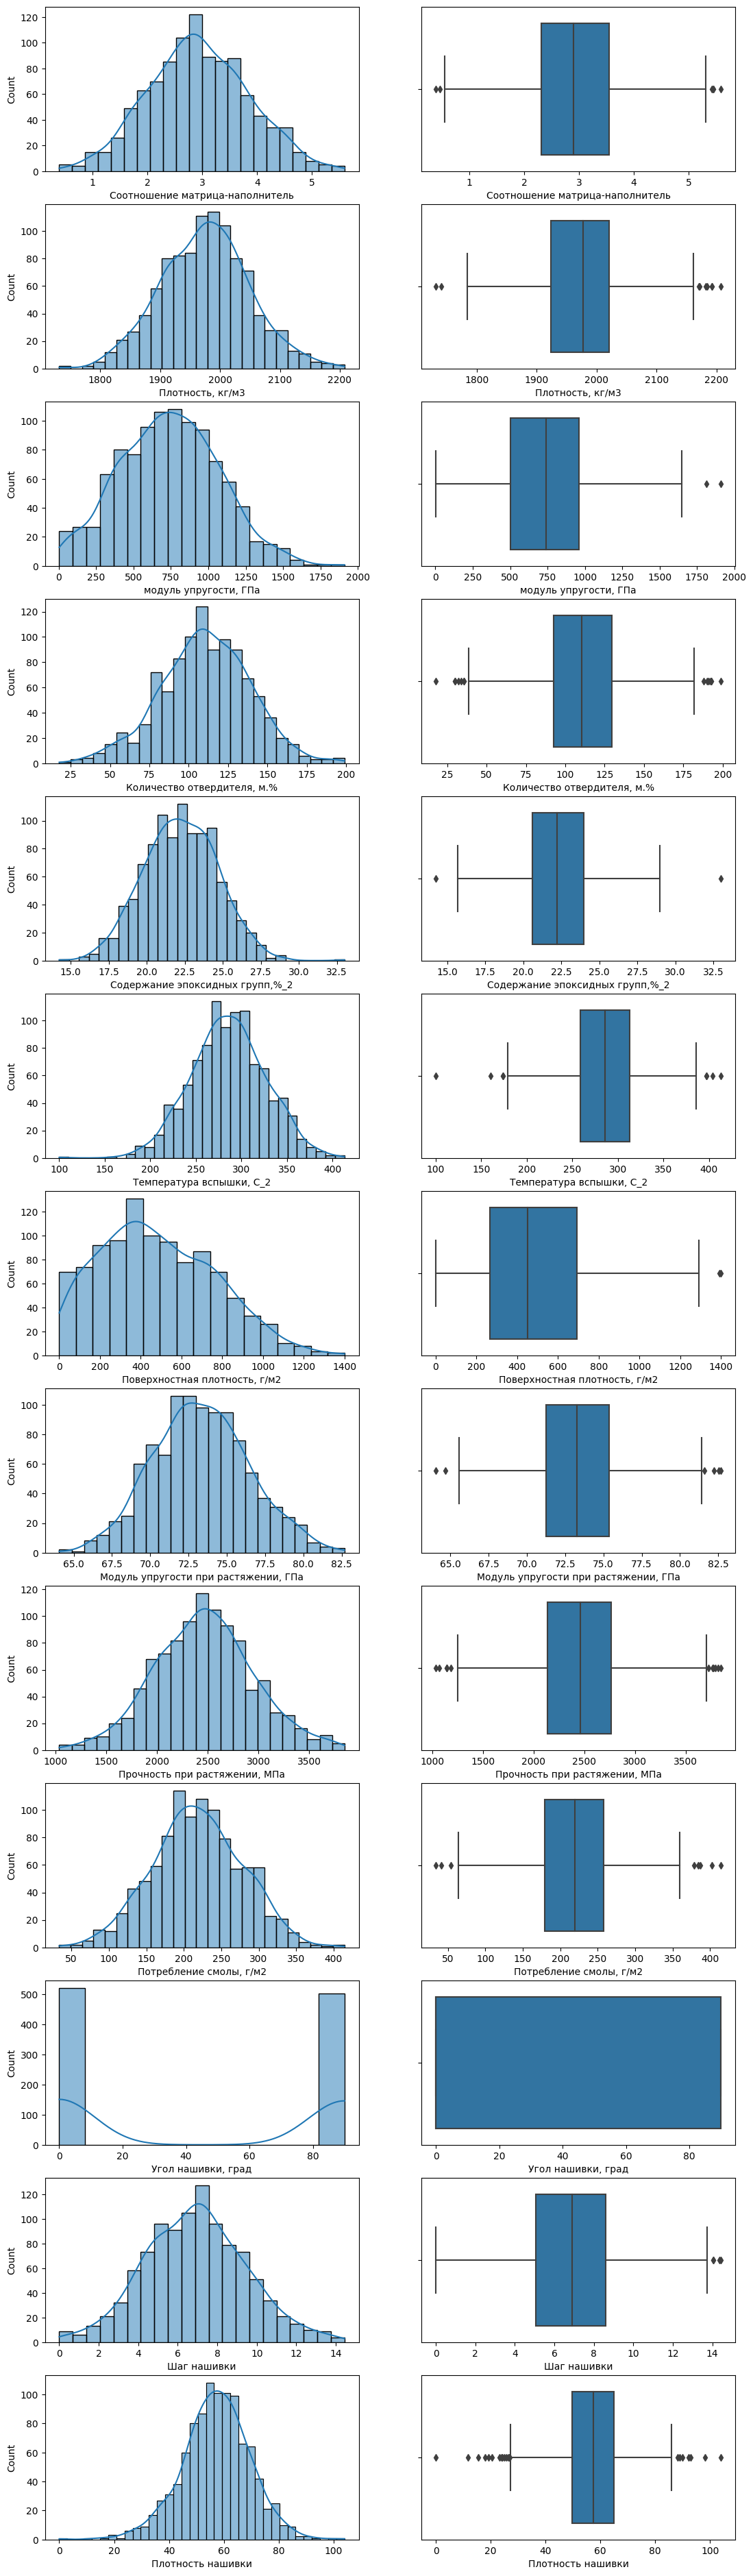

In [18]:
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sb.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sb.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

Все признаки, кроме "Угол нашивки, град" имеют нормальное распределение.
Они количественные, вещественные. Принимают неотрицательные значения.

"Угол нашивки, град" принимает 2 значения.

### Попарные графики рассеяния

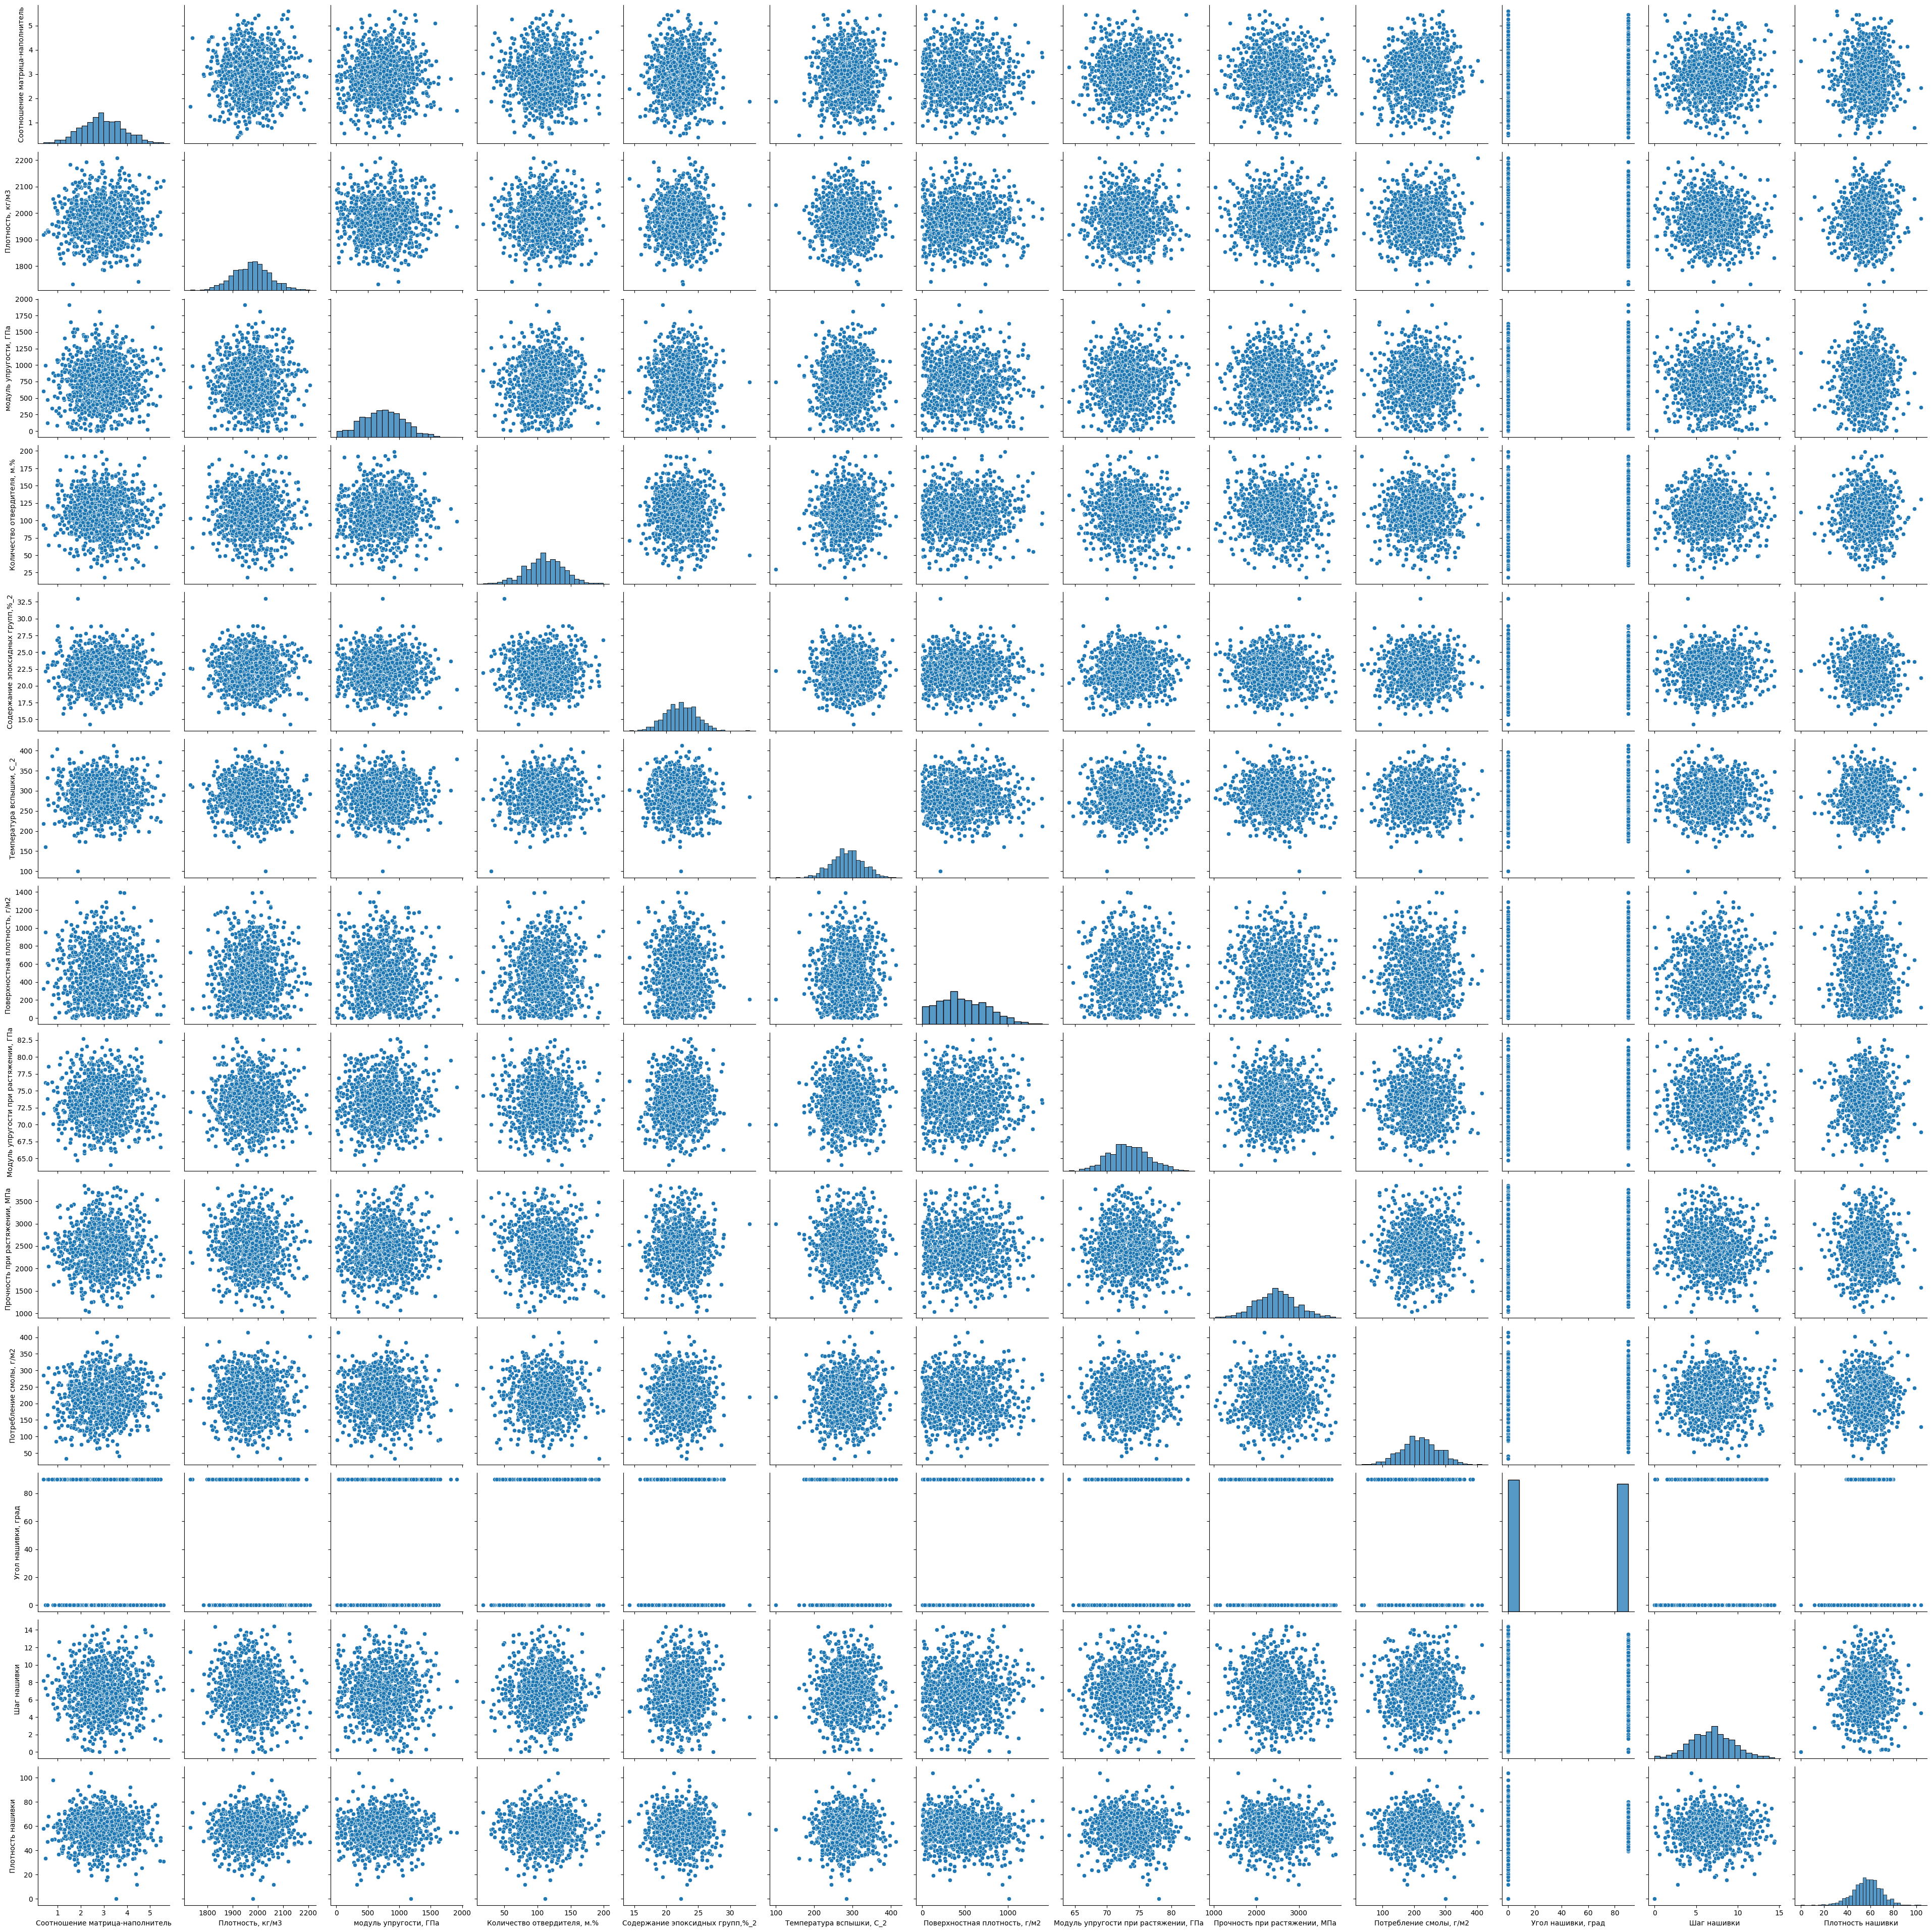

In [19]:
sb.pairplot(df, height=3);

На графиках видно, что выбросы есть. Некоторые точки стоят далеко от общего облака.

### Поиск выбросов.

Для поиска выбросов есть разные методы: 3-х сигм или межквартильных расстояний. 

Соотношение матрица-наполнитель: 3s=0 iq=6


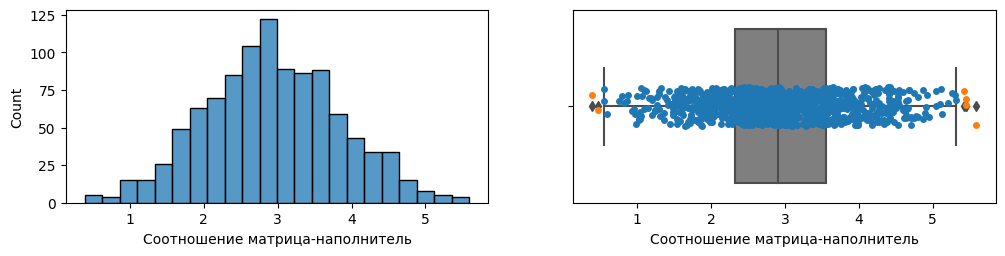

Плотность, кг/м3: 3s=3 iq=9


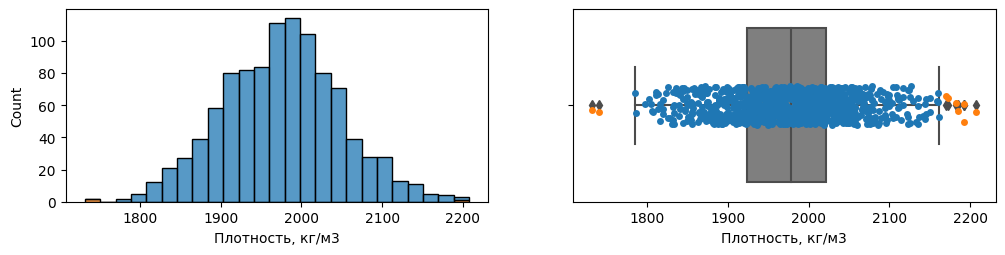

модуль упругости, ГПа: 3s=2 iq=2


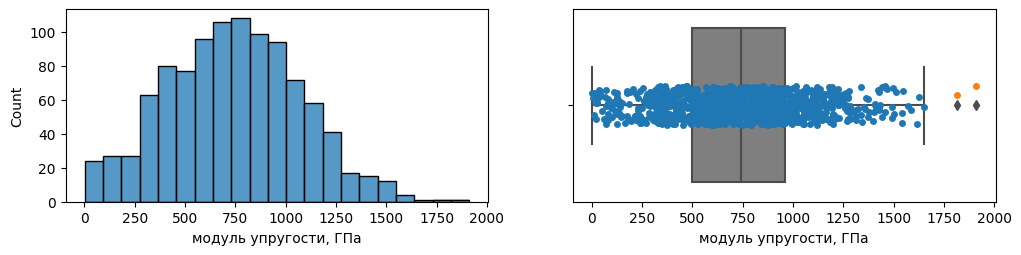

Количество отвердителя, м.%: 3s=2 iq=14


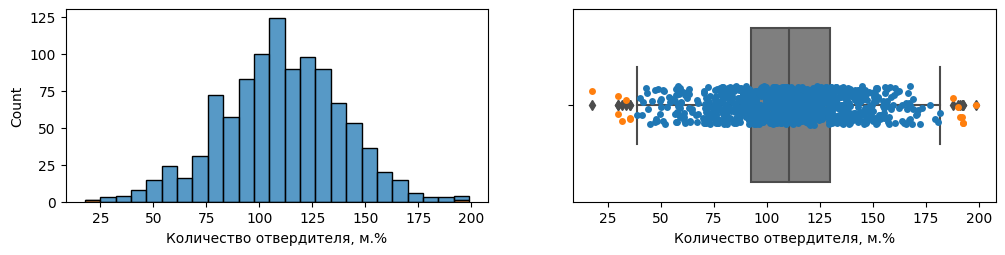

Содержание эпоксидных групп,%_2: 3s=2 iq=2


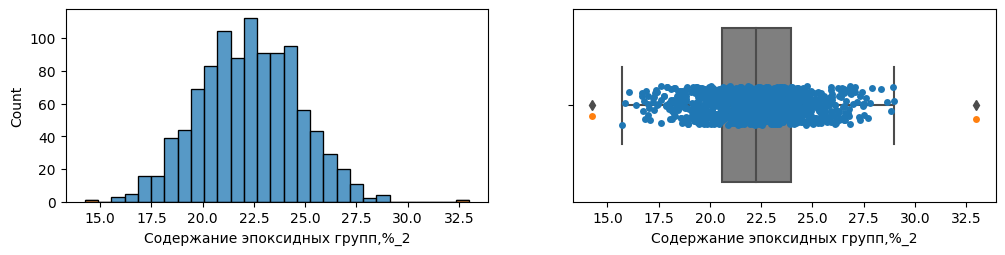

Температура вспышки, С_2: 3s=3 iq=8


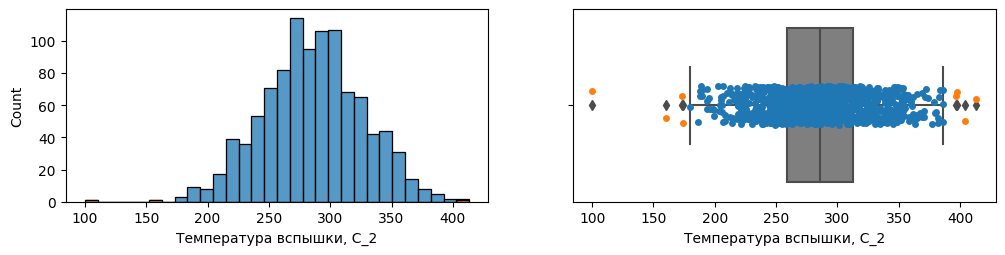

Поверхностная плотность, г/м2: 3s=2 iq=2


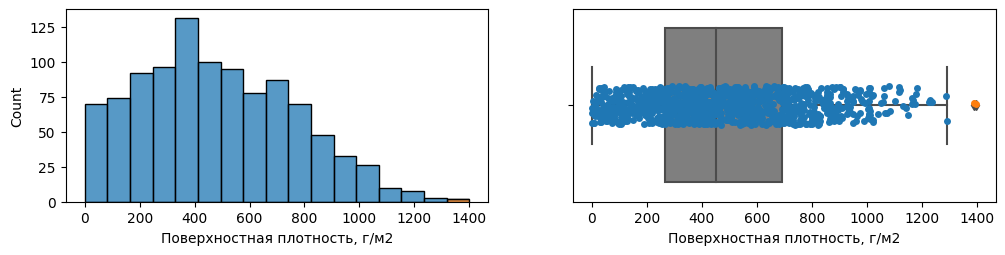

Модуль упругости при растяжении, ГПа: 3s=0 iq=6


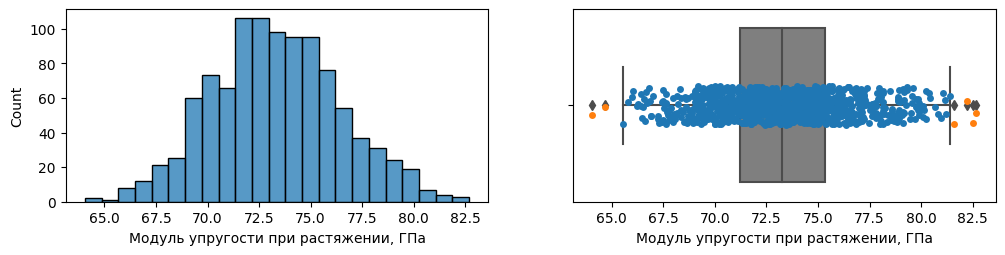

Прочность при растяжении, МПа: 3s=0 iq=11


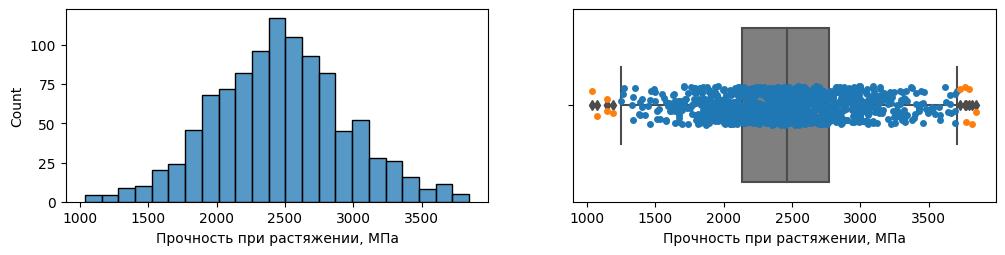

Потребление смолы, г/м2: 3s=3 iq=8


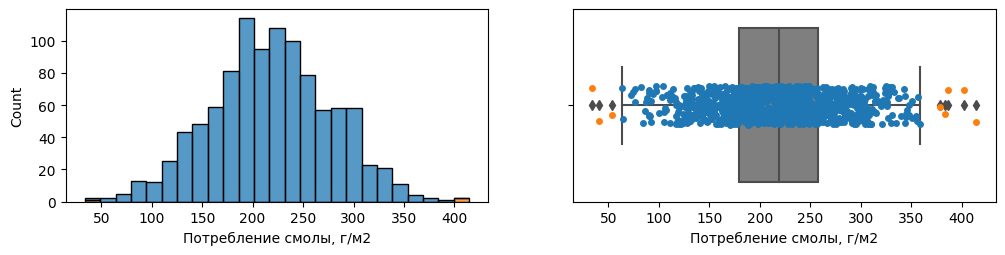

Угол нашивки, град: 3s=0 iq=0


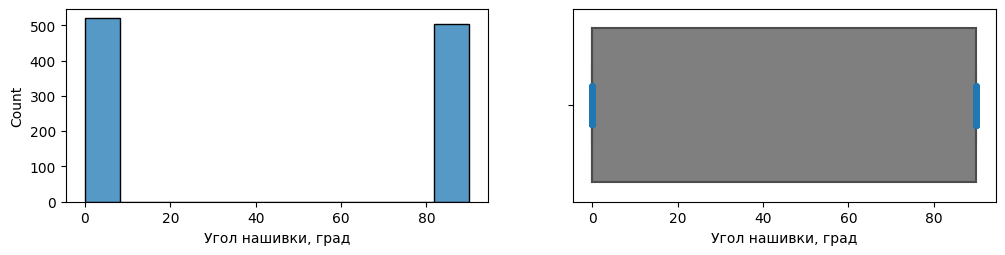

Шаг нашивки: 3s=0 iq=4


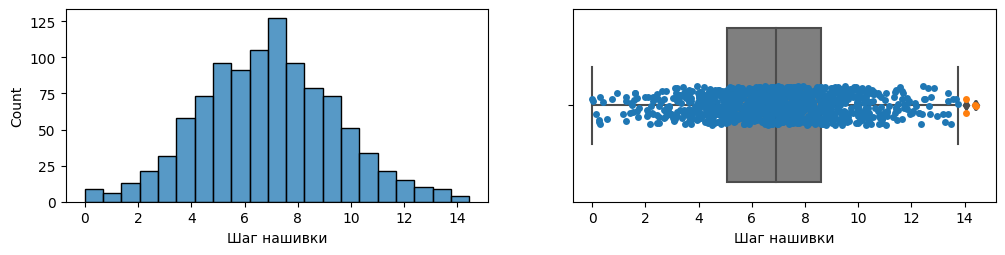

Плотность нашивки: 3s=7 iq=21


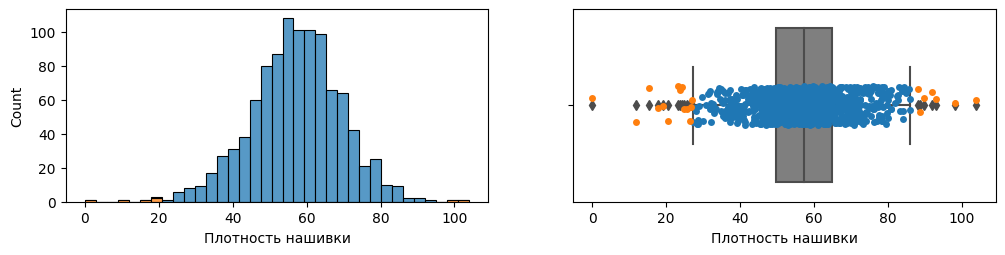

Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


In [20]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sb.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sb.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sb.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sb.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

* Метод 3-х сигм, выбросов по всем переменным: 24
* Метод межквартильных расстояний, выбросов по всем переменным: 93

Применим метод 3-х сигм, чтобы потерять меньше значимой информации.

Удалить выбросы методом 3-х сигм

In [21]:
outliers = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    outliers[column] = (zscore.abs() > 3)
df = df[outliers.sum(axis=1)==0]
df.shape

(1000, 13)

Согхраняем очищенные данные

In [22]:
df.to_excel('data_cleaned.xlsx')

Матрица корреляции.

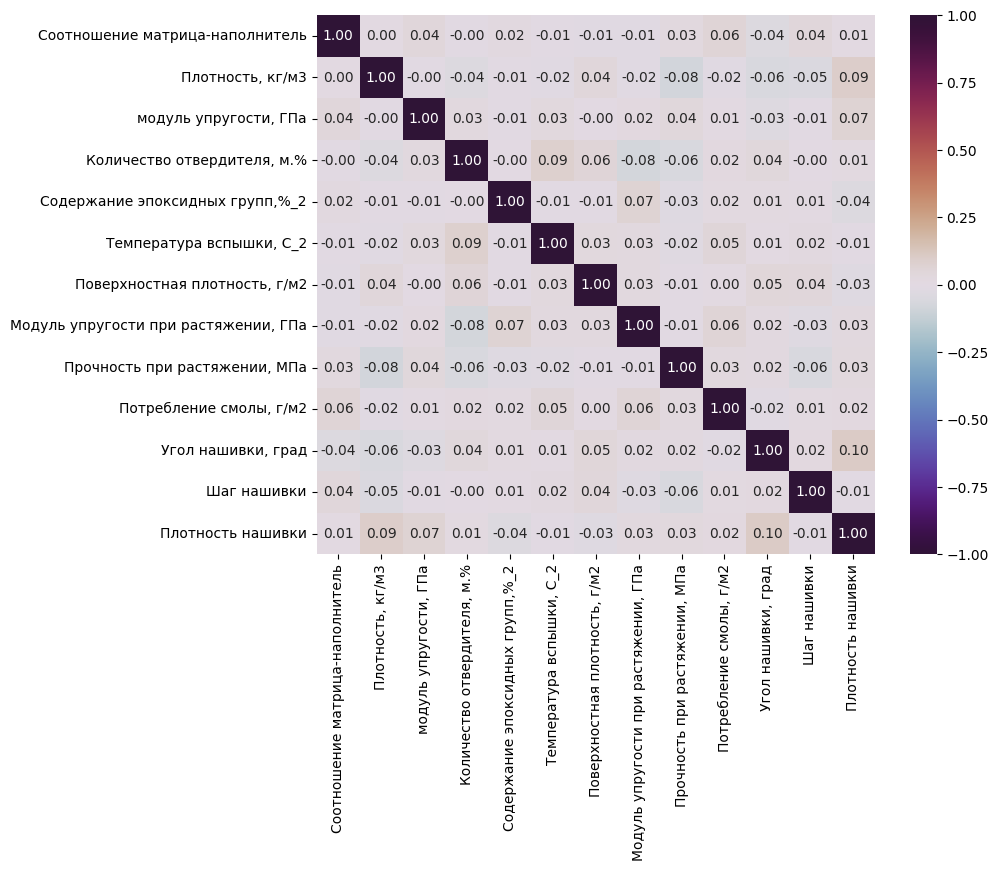

In [23]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sb.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

Коэффициенты корреляции, близкие к 0, показывают отсутствие линейной зависимости между признаками. Применение линейных моделей регрессии не даёт приемлемого результата.

## Обучение нескольких моделей

Загрузка данных

In [24]:
df = pd.read_excel('data_cleaned.xlsx', index_col=0)
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

### Разделить данные на входные и выходные признаки

Статистическими методами зависимостей обнаружено не было.

Предположим, что признаки делятся на:
* свойства матрицы;
* свойства наполнителя;
* свойства смеси и производственного процесса;
* свойства готового композита.

В этом случае целевые признаки имеют зависимости вида:
* модуль упругости при растяжении, Гпа (композит) = f(матрица, наполнитель, процесс);
* прочность при растяжении, МПа (композит) = f(матрица, наполнитель, процесс);
* соотношение матрица-наполнитель (процесс) = f(матрица, наполнитель, композит).

Для каждого из целевых признаков пострим отдельную модель и разобьём нашу задачу на 3 отдельные подзадачи.

Признаки для 1-й задачи

In [25]:
y1_columns = ['Модуль упругости при растяжении, ГПа']
x1_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [26]:
y1 = df.loc[:, y1_columns]
x1 = df.loc[:, x1_columns]

Признаки для 2-й задачи

In [27]:

y2_columns = ['Прочность при растяжении, МПа']
x2_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [28]:
y2 = df.loc[:, y2_columns]
x2 = df.loc[:, x2_columns]

Признаки для 3-й задачи

In [30]:
y3_columns = ['Соотношение матрица-наполнитель']
x3_columns = [
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Модуль упругости при растяжении, ГПа',
  'Прочность при растяжении, МПа', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [31]:
y3 = df.loc[:, y3_columns]
x3 = df.loc[:, x3_columns]

### Препроцессинг

Объявление дополнительных библиотек

In [32]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import pickle

Разделение переменных на категориальные и численные

In [34]:

x_categorical = ['Угол нашивки, град']
x1_continuous = [column for column in x1_columns if column not in x_categorical]
x2_continuous = [column for column in x2_columns if column not in x_categorical]
x3_continuous = [column for column in x3_columns if column not in x_categorical]

 Препроцессор для 1-й задачи

In [35]:
preprocessor1 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x1_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

Препроцессор для 2-й задачи

In [36]:
preprocessor2 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x2_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

Препроцессор для 3-й задачи

In [37]:
preprocessor3 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x3_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

 Срапвнение распределения признаков до и после обработки

In [38]:
def show_statistics(d):
    return d.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)

### Выбор модели

Для сравнения моделей используем несколько метрик. Для статистической устойчивости результатов используется кросс-валидацию. Оформлю запуск моделей, кросс-валидацию и получение метрик в виде вспомогательной функции.

In [39]:
def run_models(models, x, y):
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    scoring = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MAPE'] = scores['test_neg_mean_absolute_percentage_error'].mean()
        stat.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
    return stat

Для поиска параметров по сетке применим  вспомогательную функцию, чтобы везде использовалась одинаковые параметры и одинаково выводился результат.

In [41]:
def run_grid_search(model, params, x, y):
    pd.options.display.max_colwidth = 200
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    # scoring = 'neg_root_mean_squared_error'
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(x, y)
    stat.loc[:, 'params'] = searcher.cv_results_['params']
    stat.loc[:, 'MAE'] = searcher.cv_results_['mean_test_score']
    stat.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return stat, searcher.best_estimator_

И еще одна вспомогательная функция для получения метрик предсказания.

In [42]:
def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) * -1
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) * -1
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred) * -1
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) * -1
    return stat

Для определения нижней границы качества модели, используется базовая модель, возвращающая среднее значение целевого признака. Рабочая модель по своим характеристикам должна быть лучше базовой. Создадим класс, унаследованный от BaseEstimator. А также можно использовать DummyRegressor из sklearn.

### Модель для модуля упругости при растяжении, ГПа

Разделение на тренировочную и тестовую выборку

In [43]:
x1_train_raw, x1_test_raw, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=RANDOM_STATE)
print('x1_train:', x1_train_raw.shape, 'y1_train:', y1_train.shape)
print('x1_test:', x1_test_raw.shape, 'y1_test:', y1_test.shape)

x1_train: (700, 11) y1_train: (700, 1)
x1_test: (300, 11) y1_test: (300, 1)


Препроцессинг входных переменных

In [44]:
x1_train = preprocessor1.fit_transform(x1_train_raw)
x1_test = preprocessor1.transform(x1_test_raw)

In [45]:
y1_train = y1_train['Модуль упругости при растяжении, ГПа'].values
y1_test = y1_test['Модуль упругости при растяжении, ГПа'].values

Описательная статистика входных данных до предобработки

In [46]:
show_statistics(x1_train_raw)

Описательная статистика входных данных после предобработки

In [48]:
show_statistics(pd.DataFrame(x1_train, columns=(x1_continuous + x_categorical)))

Описательная статистика выходной переменной

In [49]:
show_statistics(y1_train)

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

Сравнение моделей с параметрами по умолчанию

In [50]:
def_models1 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'RandomForestRegressor': RandomForestRegressor(random_state=RANDOM_STATE)
}

stat1_1 = run_models(def_models1, x1_train, y1_train)
stat1_1.style.highlight_max(axis=0)

Ни одна из выбранных моделей не оказалась подходящей  для наших данных. 

Коэффициент детерминации R2 близок к 0 для линейных моделей и метода опорных векторов. Значит, они не лучше базовой модели. Остальные метрики у них примерно совпадают с базовой моделью.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали метод ближайших соседей и деревья решений.

Случайный лес отработал лучше, чем одно дерево решений, но хуже, чем линейные модели.

Приступаем к поиску лучших моделей

In [51]:
s_models1 = {}

In [52]:
params1 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1510, 10)
  },           
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1510, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
239  {'alpha': 480, 'solver': 'sparse_cg'} -2.455538     1

In [53]:
params1 = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
search, smodel = run_grid_search(Lasso(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
6  {'alpha': 0.15} -2.459921     1

In [54]:
params1 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'C': [0.01, 0.02, 0.03, 0.04]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.01, 0.02, 0.03, 0.04, 0.5]
    }
]
search, smodel = run_grid_search(SVR(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
3  {'C': 0.015, 'kernel': 'linear'} -2.456808     1

In [55]:
params1 = {
    'n_neighbors': range(3, 31, 2)
}
search, smodel = run_grid_search(KNeighborsRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
11  {'n_neighbors': 25} -2.461113     1

In [56]:
params1 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params  \
159  {'criterion': 'absolute_error', 'max_depth': 2, 'max_features': 10, 'random_state': 3128, 'splitter': 'random'}   

         MAE  rank  
159 -2.43505     1

In [57]:
params1 = {
    'random_state': [RANDOM_STATE],
    'n_estimators': [50, 100], 
    'criterion': ['absolute_error'],
    'max_depth': [2, 3, 4, 5],
    'max_features': [1, 2, 11],
    'bootstrap': [False]
}
search, smodel = run_grid_search(RandomForestRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==10]

params  \
8  {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 2, 'n_estimators': 50, 'random_state': 3128}   

        MAE  rank  
8 -2.457202    10

Сравнение моделей с подобранными параметрами, поиск лучшей

In [58]:
stat1_2 = run_models(s_models1, x1_train, y1_train)
stat1_2.style.highlight_max(axis=0)

Можно сделать вывод, что подбирая гиперпараметры, можно улучшить предсказание выбранной модели. 

Все модели крайне плохо описывают исходные данные - не удалось добиться положительного значения R2. Самый лучший результат дает коэффициент детерминации близкий к нулю, что соответствует базовой модели. 

Линейные модели так и остались сравнимы с базовой моделью. Их характеристики улучшились, но не значительно.

Метод опорных векторов в процессе подбора гиперпараметры лучшим ядром выбрал линейное и отработал аналогично линейным моделям, получил очень близкие метрики.

Метод ближайших соседей увеличением количества соседей радикально улучшил качество работы. Но его лучшие результаты все равно немного, но отстают от линейных моделей.

Деревья решений при кропотливом подборе параметров превзошли результат линейной модели. Но они по-прежнему не являются объясняющей зависимость моделью.

Собирая деревья в ансамбли, можно еще улучшить характеристики. Но подбор параметров затруднен тем, что это затратный по времени процесс. Не удалось получить комбинацию параметров для леса, которая была был лучше дерева решений.

Предсказание базовой модели

In [62]:
base_model1 = DummyRegressor(strategy='mean')
base_model1.fit(x1_train, y1_train)
y1_pred_base = base_model1.predict(x1_test)

Предсказание лучшей модели

In [63]:
best_model1 = DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10, random_state=RANDOM_STATE, splitter='random')
best_model1.fit(x1_train, y1_train)
y1_pred_best = best_model1.predict(x1_test)

Визуализация

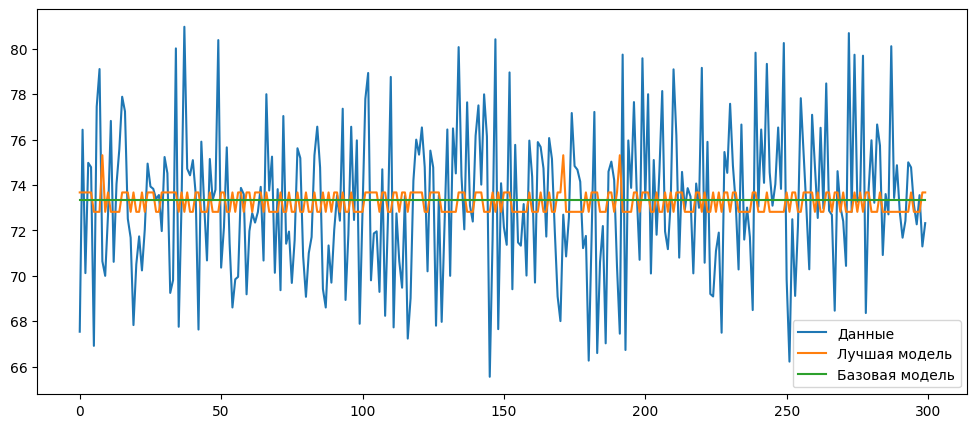

In [64]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y1_test, label='Данные')
ax.plot(y1_pred_best, label='Лучшая модель')
ax.plot(y1_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Сложно визуализировать регрессию в многомерном пространстве. Но даже на таком графике мы видим, насколько не соответствует лучшая модель исходным данным.

Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве

In [65]:
compare1 = get_metrics('Базовая модель', y1_test, y1_pred_base)
compare1 = compare1.append(get_metrics('Лучшая модель (дерево решений)', y1_test, y1_pred_best))
compare1

C:\Users\thour\AppData\Local\Temp\ipykernel_26436\3100756169.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare1 = compare1.append(get_metrics('Лучшая модель (дерево решений)', y1_test, y1_pred_best))


R2      RMSE       MAE      MAPE  \
Базовая модель                 -0.001377 -3.222954 -2.577796 -0.035319   
Лучшая модель (дерево решений) -0.035776 -3.277844 -2.610243 -0.035707   

                                max_error  
Базовая модель                  -7.800690  
Лучшая модель (дерево решений)  -8.152045

### Модель для прочности при растяжении, МПа

Разделение на тренировочную и тестовую выборку

In [66]:
x2_train_raw, x2_test_raw, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=RANDOM_STATE)
print('x2_train:', x2_train_raw.shape, 'y2_train:', y2_train.shape)
print('x2_test:', x2_test_raw.shape, 'y2_test:', y2_test.shape)

x2_train: (700, 11) y2_train: (700, 1)
x2_test: (300, 11) y2_test: (300, 1)


Препроцессинг входных переменных

In [67]:
x2_test = preprocessor2.fit_transform(x2_test_raw)
x2_train = preprocessor2.transform(x2_train_raw)

Выходная переменная преобразованиям не подвергается

In [68]:
y2_train = y2_train['Прочность при растяжении, МПа'].values
y2_test = y2_test['Прочность при растяжении, МПа'].values

Описательная статистика входных данных до предобработки

In [69]:
show_statistics(x2_train_raw)

Описательная статистика входных данных после предобработки

In [ ]:
show_statistics(pd.DataFrame(x2_train, columns=(x2_continuous + x_categorical)))

Описательная статистика выходной переменной

In [70]:

show_statistics(y2_train)

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

Запускаю различные модели с параметрами по умолчанию

In [71]:
models2_def = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=RANDOM_STATE)    
}

stat2_1 = run_models(models2_def, x2_train, y2_train)
stat2_1.style.highlight_max(axis=0)

Ни одна из выбранных мной моделей не соответствует данным.

R2 близок к 0 для линейных моделей и метода опорных векторов. Значит, они не лучше базовой модели. И остальные метрики у них примерно совпадают с базовой моделью.

Хуже линейных с гиперпараметрами по умолчанию отработали деревья решений.

Градиентный бустинг с параметрами по умолчанию отработал лучше дерева, сравнимо с базовой моделью.

Приступаем к поиску лучших моделей

In [72]:
s_models2 = {}

In [ ]:
params2 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1000, 10)
  },
  {
    'solver': ['sag', 'saga'],
    'alpha': range(10, 1000, 10),
    'random_state': [RANDOM_STATE]
  },
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1000, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
494  {'alpha': 990, 'solver': 'sparse_cg'} -385.891069     1

In [73]:
params2 = [
  {
    'alpha': [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 100]
  }
]
search, smodel = run_grid_search(Lasso(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
7   {'alpha': 50} -385.827028     1
8   {'alpha': 60} -385.827028     1
9  {'alpha': 100} -385.827028     1

In [ ]:
params2 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'gamma': ['scale', 'auto'],
      'C': [0.01, 0.05, 0.1, 0.2, 0.3]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.001, 0.01, 0.1]
    }
]

search, smodel = run_grid_search(SVR(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
12  {'C': 0.2, 'gamma': 'scale', 'kernel': 'rbf'} -385.724279     1

In [74]:
params2 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
220  {'criterion': 'poisson', 'max_depth': 3, 'max_features': 1, 'random_state': 3128, 'splitter': 'best'}   

            MAE  rank  
220 -384.148263     1

In [75]:
params2 = {
    'random_state': [RANDOM_STATE],
    'loss': ['squared_error', 'absolute_error'], 
    #'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 2, 3],
    'max_features': [1, 2, 5, 11]    
}
search, smodel = run_grid_search(GradientBoostingRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
0  {'loss': 'squared_error', 'max_depth': 1, 'max_features': 1, 'n_estimators': 50, 'random_state': 3128}   

          MAE  rank  
0 -385.268908     1

Сравнение моделей с подобранными параметрами, поиск лучшей

In [76]:
stat2_2 = run_models(s_models2, x2_train, y2_train)
stat2_2.style.highlight_max(axis=0)

 Результаты аналогичны полученным в предыдущем подразделе, за исключением того, что здесь применяется GradientBoosting. После подбора параметров он оказался немного лучше остальных моделей. Но по-прежнему крайне плохо описывает исходные данные и не может применяться в рабочем приложении.

Подбор гиперпараметров не помог получить модель, превосходящую базовую. Все модели крайне плохо описывают исходные данные. Не удалось добиться коэффициента детерминации, большего нуля.

Линейные после подбора немного улучшили характеристики. 

Метод опорных векторов отработал аналогично линейным моделям.

Деревья решений после подбора параметров улучшили неудачный результат с параметрами по умолчанию.

Но лучший результат дает градиентный бустинг. Значения ошибок примерно такие же, как у дерева решений. Но коэффициент детерминации немного больше, что показывает чуть лучшую объясняющую способность модели.

Предсказание базовой модели

In [77]:
base_model2 = DummyRegressor(strategy='mean')
base_model2.fit(x2_train, y2_train)
y2_pred_base = base_model2.predict(x2_test)

Предсказание лучшей модели

In [78]:
best_model2 = GradientBoostingRegressor(max_depth=1, max_features=1, n_estimators=50, random_state=RANDOM_STATE)
best_model2.fit(x2_train, y2_train)
y2_pred_best = best_model2.predict(x2_test)

Визуализация

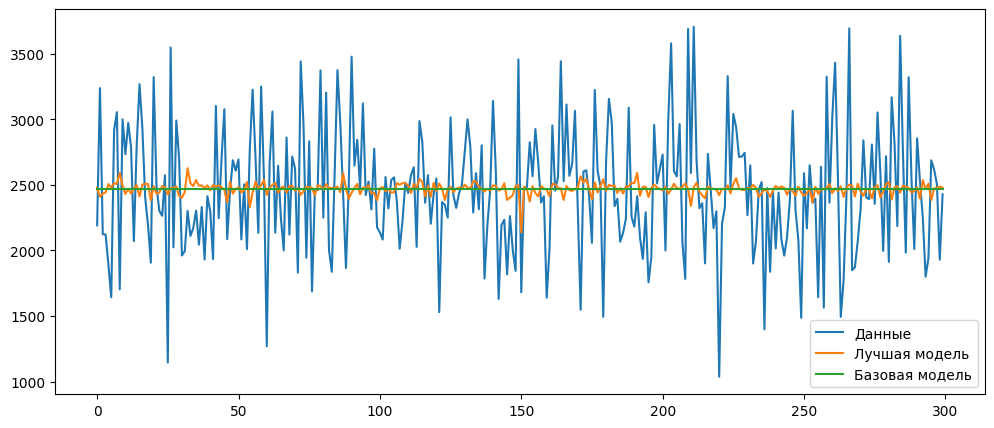

In [79]:

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y2_test, label='Данные')
ax.plot(y2_pred_best, label='Лучшая модель')
ax.plot(y2_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Визуализируя результаты градиентного бустинга с выбранными параметрами, видно насколько они далеки от исходных данных. 

Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве

In [80]:
compare2 = get_metrics('Базовая модель', y2_test, y2_pred_base)
compare2 = compare2.append(get_metrics('Лучшая модель (градиентный бустинг)', y2_test, y2_pred_best))
compare2

C:\Users\thour\AppData\Local\Temp\ipykernel_26436\442112860.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare2 = compare2.append(get_metrics('Лучшая модель (градиентный бустинг)', y2_test, y2_pred_best))


R2        RMSE         MAE  \
Базовая модель                      -0.000531 -479.694153 -375.066608   
Лучшая модель (градиентный бустинг)  0.004028 -478.600202 -376.647056   

                                         MAPE    max_error  
Базовая модель                      -0.165566 -1431.321957  
Лучшая модель (градиентный бустинг) -0.166046 -1384.841404

### Модель для соотношения матрица-наполнитель

Разделение на тренировочную и тестовую выборку

In [81]:
x3_train_raw, x3_test_raw, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=RANDOM_STATE)
print('x3_train:', x3_train_raw.shape, 'y3_train:', y3_train.shape)
print('x3_test:', x3_test_raw.shape, 'y3_test:', y3_test.shape)

x3_train: (700, 12) y3_train: (700, 1)
x3_test: (300, 12) y3_test: (300, 1)


Препроцессинг входных переменных

In [82]:
x3_test = preprocessor3.fit_transform(x3_test_raw)
x3_train = preprocessor3.transform(x3_train_raw)

In [83]:
y3_train = y3_train['Соотношение матрица-наполнитель'].values
y3_test = y3_test['Соотношение матрица-наполнитель'].values

Описательная статистика входных данных до предобработки

In [84]:
show_statistics(x3_train_raw)

Описательная статистика входных данных после предобработки

In [85]:
show_statistics(pd.DataFrame(x3_train, columns=(x3_continuous + x_categorical)))

Описательная статистика выходной переменной

In [ ]:
show_statistics(y3_train)

## Базовая модель DummyRegression

In [86]:
base_model3 = DummyRegressor(strategy='mean')

Предсказание базовой модели

In [87]:
base_model3.fit(x3_train, y3_train)
y3_pred_base = base_model3.predict(x3_test)

In [88]:
from sklearn.neural_network import MLPRegressor

Настройка нейросети

In [89]:
model3_1 = MLPRegressor(
    hidden_layer_sizes = (8, 8),
    activation = 'relu',
    solver='adam',
    max_iter=5000,
    early_stopping = True,
    validation_fraction = 0.3,
    random_state=RANDOM_STATE, 
    verbose=True
)

Нейросеть

In [90]:
%%time
model3_1.fit(x3_train, y3_train)

Iteration 1, loss = 4.23333329
Validation score: -8.877397
Iteration 2, loss = 4.16425011
Validation score: -8.724003
Iteration 3, loss = 4.09844934
Validation score: -8.570177
Iteration 4, loss = 4.03156987
Validation score: -8.418169
Iteration 5, loss = 3.96685593
Validation score: -8.266649
Iteration 6, loss = 3.90109499
Validation score: -8.113740
Iteration 7, loss = 3.83509663
Validation score: -7.959929
Iteration 8, loss = 3.77111619
Validation score: -7.804319
Iteration 9, loss = 3.70474028
Validation score: -7.647998
Iteration 10, loss = 3.63894117
Validation score: -7.489097
Iteration 11, loss = 3.57247706
Validation score: -7.329929
Iteration 12, loss = 3.50478995
Validation score: -7.169444
Iteration 13, loss = 3.43672870
Validation score: -7.007682
Iteration 14, loss = 3.36766816
Validation score: -6.844371
Iteration 15, loss = 3.29949725
Validation score: -6.679560
Iteration 16, loss = 3.22954208
Validation score: -6.512621
Iteration 17, loss = 3.16154812
Validation score:

MLPRegressor(early_stopping=True, hidden_layer_sizes=(8, 8), max_iter=5000,
             random_state=3128, validation_fraction=0.3, verbose=True)

График ошибки

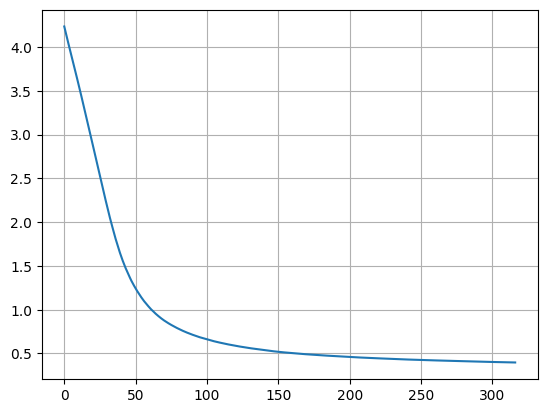

In [91]:

plt.plot(model3_1.loss_curve_)
plt.grid(True)
plt.show()

Предсказание нейросети

In [92]:
y3_pred_skl = model3_1.predict(x3_test)

 Визуализация

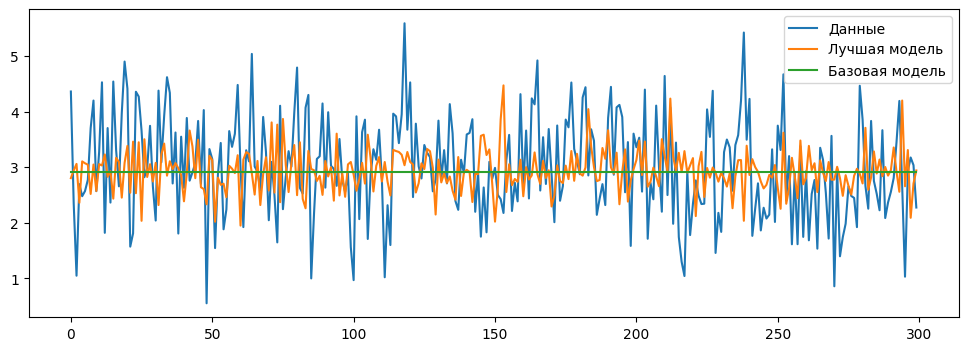

In [93]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_skl, label='Лучшая модель')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве

In [94]:
compare3_1 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y3_test, y3_pred_skl))
compare3_1

C:\Users\thour\AppData\Local\Temp\ipykernel_26436\2809748256.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y3_test, y3_pred_skl))


R2      RMSE       MAE      MAPE  max_error
DummyRegressor -0.011269 -0.911261 -0.737067 -0.299795  -2.684301
MLPRegressor   -0.168754 -0.979650 -0.782010 -0.315500  -3.388824

Нейросеть, построенная с помощью MLPRegressor, возвращает данные, похожие на исходные. Но ошибка  по всем метрикам значительно хуже, чем у базовой модели. 

Построение нейронной сети с помощью библиотеки TensorFlow.

Импорт библиотеки TensorFlow


In [95]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.12.0


Функция, собирающая нейросеть заданной архитектуры

In [96]:

def construct_model():
    return tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=8, activation='relu', name='dense_1'),
      keras.layers.Dense(units=8, activation='relu', name='dense_2'),
      keras.layers.Dense(units=1, name='out')                        
    ])

Функция, компилирующая нейросеть с заданными параметрами

In [98]:
def compile_model(model):
    model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsolutePercentageError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model


Функция для построения графика ошибки

In [99]:
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].plot(history['loss'], label='loss')
  axes[0].plot(history['val_loss'], label='val_loss')
  axes[0].set_xlabel('Эпоха')
  axes[0].set_ylabel('MAPE')
  axes[0].legend()
  axes[0].grid(True)
  axes[1].plot(history['root_mean_squared_error'], label='loss')
  axes[1].plot(history['val_root_mean_squared_error'], label='val_loss')
  axes[1].set_xlabel('Эпоха')
  axes[1].set_ylabel('RMSE')
  axes[1].legend()
  axes[1].grid(True)
  plt.show()

Сборка нейросети

In [100]:
model3_2 = construct_model()

Компиляция нейросети

In [101]:
model3_2 = compile_model(model3_2)

Сводная информация по архитектуре сети

In [102]:
model3_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 out (Dense)                 (None, 1)                 9         
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


Архитектура нейросети визуально


In [107]:
keras.utils.plot_model(model3_2, show_shapes=True, show_layer_names=True, show_layer_activations=True)

Defaulting to user installation because normal site-packages is not writeable
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Обучение нейросети

In [108]:
%%time
history = model3_2.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
16/16 [==============================] - 1s 10ms/step - loss: 106.2833 - root_mean_squared_error: 3.2178 - val_loss: 104.3983 - val_root_mean_squared_error: 3.1766
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 102.1690 - root_mean_squared_error: 3.1149 - val_loss: 100.3126 - val_root_mean_squared_error: 3.0774
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 98.2067 - root_mean_squared_error: 3.0176 - val_loss: 96.2941 - val_root_mean_squared_error: 2.9806
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 94.1421 - root_mean_squared_error: 2.9211 - val_loss: 92.0186 - val_root_mean_squared_error: 2.8787
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 89.7099 - root_mean_squared_error: 2.8177 - val_loss: 86.9934 - val_root_mean_squared_error: 2.7606
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 84.2306 - root_mean_squared_error: 2.6931 - val_loss: 80.6114 -

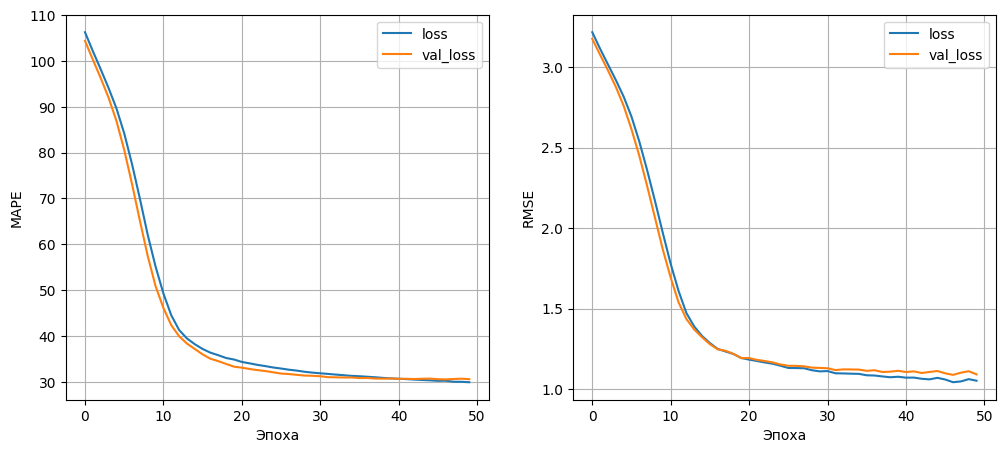

In [109]:
plot_loss(history.history)

Проверяем точность нейросети на тестовых данных

In [110]:
model3_2.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 898us/step - loss: 32.9244 - root_mean_squared_error: 1.1424


[32.9244499206543, 1.1424380540847778]

Предсказание 

In [112]:
y3_pred_keras2 = model3_2.predict(x3_test)

10/10 [==============================] - 0s 593us/step


Визуализация

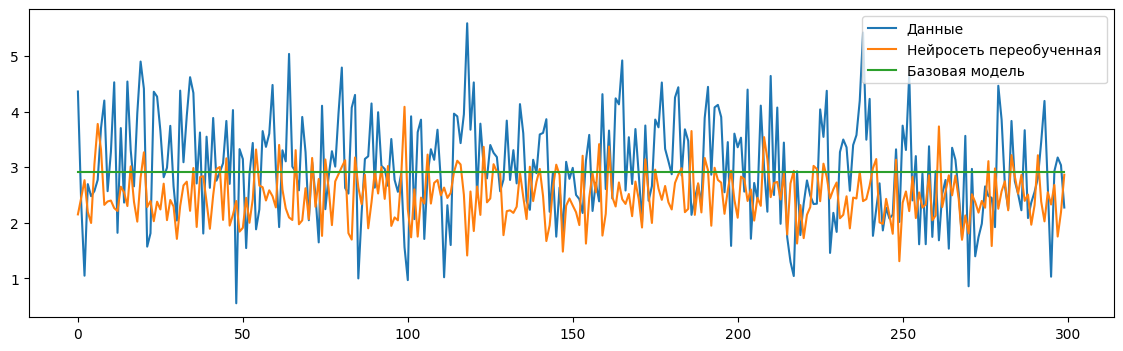

In [113]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras2, label='Нейросеть переобученная')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Применим раннюю остановку процесса обучения для борьбы с переобучением

Создадим модель с той же архитектурой

In [114]:
model3_3 = construct_model()
model3_3 = compile_model(model3_3)

Обучение нейросети

In [115]:
%%time
history = model3_3.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

Epoch 1/50
16/16 [==============================] - 1s 8ms/step - loss: 106.0514 - root_mean_squared_error: 3.1993 - val_loss: 104.2417 - val_root_mean_squared_error: 3.1922
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 100.7387 - root_mean_squared_error: 3.0616 - val_loss: 98.7118 - val_root_mean_squared_error: 3.0557
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 95.6609 - root_mean_squared_error: 2.9357 - val_loss: 93.4574 - val_root_mean_squared_error: 2.9267
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 90.4223 - root_mean_squared_error: 2.8089 - val_loss: 88.1373 - val_root_mean_squared_error: 2.7900
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 84.5640 - root_mean_squared_error: 2.6724 - val_loss: 82.2349 - val_root_mean_squared_error: 2.6391
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 77.9159 - root_mean_squared_error: 2.5184 - val_loss: 75.7368 - v

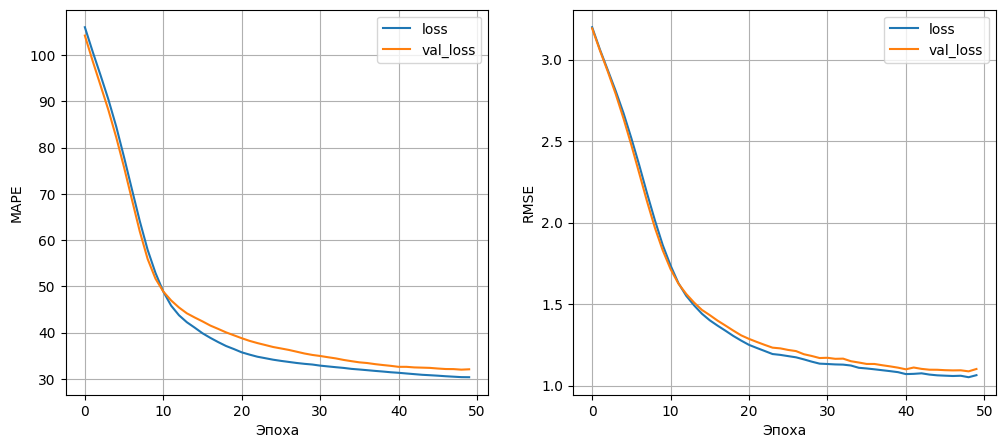

In [116]:
plot_loss(history.history)

Проверяем точность нейросети на тестовых данных

In [117]:
model3_3.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 783us/step - loss: 33.1866 - root_mean_squared_error: 1.1666


[33.18663024902344, 1.166613221168518]

Предсказание 

In [118]:
y3_pred_keras3 = model3_3.predict(x3_test)

10/10 [==============================] - 0s 690us/step


Визуализация

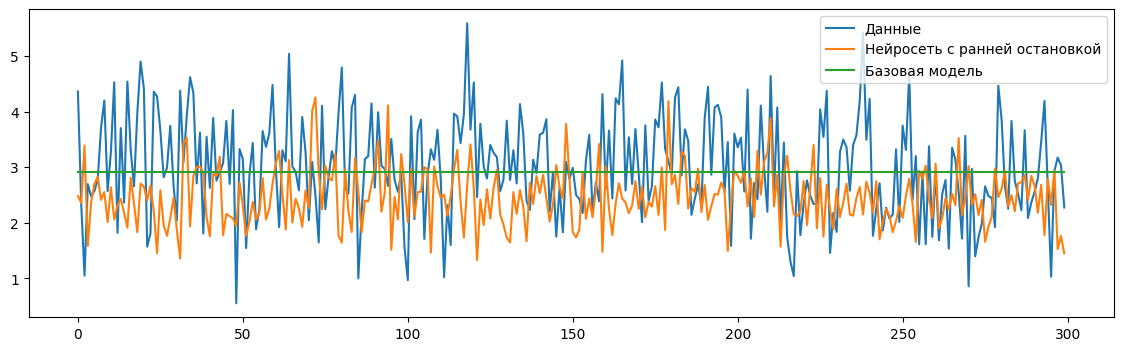

In [119]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras3, label='Нейросеть с ранней остановкой')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Добавление Dropout-слоя.

Построение аналогичной модели с Dropout слоем

In [124]:

model3_4 = tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=8, activation='relu', name='dense_1'),
      keras.layers.Dropout(0.05, name='dropout_1'),
      keras.layers.Dense(units=8, activation='relu', name='dense_2'),
      keras.layers.Dropout(0.05, name='dropout_2'),
      keras.layers.Dense(units=1, name='out')                        
    ])

Компиляция модели

In [125]:
model3_4 = compile_model(model3_4)

In [126]:
model3_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 out (Dense)                 (None, 1)                 9         
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


Обучение нейросети

In [127]:
%%time
history = model3_4.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
16/16 [==============================] - 1s 8ms/step - loss: 100.1912 - root_mean_squared_error: 3.0695 - val_loss: 93.0747 - val_root_mean_squared_error: 2.9490
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 92.3690 - root_mean_squared_error: 2.8652 - val_loss: 85.0173 - val_root_mean_squared_error: 2.7618
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 83.8367 - root_mean_squared_error: 2.6786 - val_loss: 77.7817 - val_root_mean_squared_error: 2.5857
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 77.4799 - root_mean_squared_error: 2.4922 - val_loss: 71.4897 - val_root_mean_squared_error: 2.4199
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 71.0698 - root_mean_squared_error: 2.3555 - val_loss: 65.8302 - val_root_mean_squared_error: 2.2613
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 64.6929 - root_mean_squared_error: 2.1944 - val_loss: 61.0326 - val

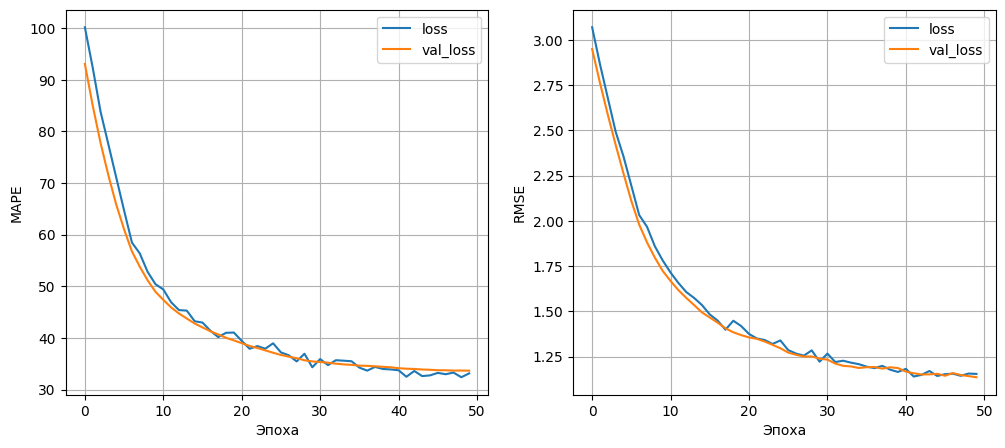

In [128]:
plot_loss(history.history)

Проверяем точность нейросети на тестовых данных

In [129]:
model3_4.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 799us/step - loss: 33.3981 - root_mean_squared_error: 1.1656


[33.39812088012695, 1.1655694246292114]

Предсказание 

In [130]:
y3_pred_keras4 = model3_4.predict(x3_test)

10/10 [==============================] - 0s 670us/step


Визуализация

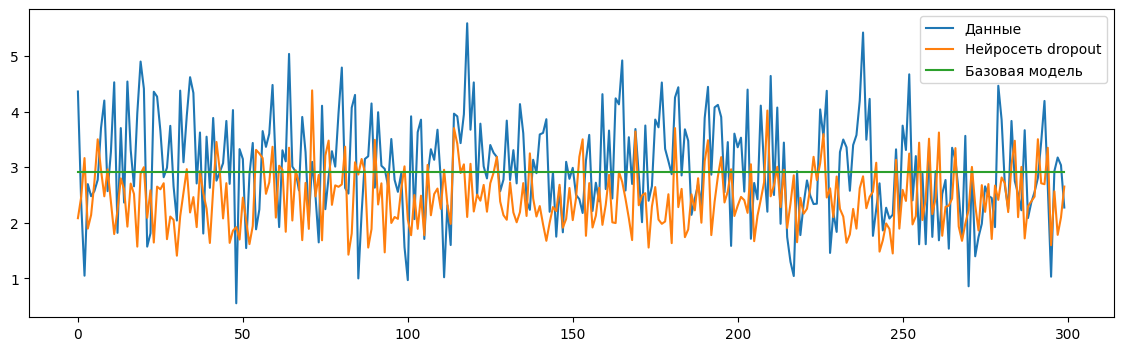

In [132]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras4, label='Нейросеть dropout')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве

In [133]:

compare3_2 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_2 = compare3_2.append(get_metrics('Нейросеть переобученная', y3_test, y3_pred_keras2))
compare3_2 = compare3_2.append(get_metrics('Нейросеть с ранней остановкой', y3_test, y3_pred_keras3))
compare3_2 = compare3_2.append(get_metrics('Нейросеть dropout', y3_test, y3_pred_keras4))
compare3_2

C:\Users\thour\AppData\Local\Temp\ipykernel_26436\3929767816.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('Нейросеть переобученная', y3_test, y3_pred_keras2))
C:\Users\thour\AppData\Local\Temp\ipykernel_26436\3929767816.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('Нейросеть с ранней остановкой', y3_test, y3_pred_keras3))
C:\Users\thour\AppData\Local\Temp\ipykernel_26436\3929767816.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('Нейросеть dropout', y3_test, y3_pred_keras4))


R2      RMSE       MAE      MAPE  \
DummyRegressor                -0.011269 -0.911261 -0.737067 -0.299795   
Нейросеть переобученная       -0.589450 -1.142438 -0.924902 -0.329245   
Нейросеть с ранней остановкой -0.657430 -1.166613 -0.946519 -0.331866   
Нейросеть dropout             -0.654466 -1.165569 -0.949745 -0.333981   

                               max_error  
DummyRegressor                 -2.684301  
Нейросеть переобученная        -4.179808  
Нейросеть с ранней остановкой  -3.275375  
Нейросеть dropout              -3.486556

## Оцененка точности модели на тренировочном и тестовом датасете

In [134]:
best_model1

DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10,
                      random_state=3128, splitter='random')

In [135]:
result1 = pd.DataFrame()
y1_pred_train = best_model1.predict(x1_train)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тренировочный', y1_train, y1_pred_train)])
y1_pred_test = best_model1.predict(x1_test)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тестовый', y1_test, y1_pred_test)])
result1

R2      RMSE       MAE      MAPE  \
Модуль упругости, тренировочный  0.017295 -3.037284 -2.410294 -0.032850   
Модуль упругости, тестовый      -0.035776 -3.277844 -2.610243 -0.035707   

                                 max_error  
Модуль упругости, тренировочный  -9.008468  
Модуль упругости, тестовый       -8.152045

Дерево решений имеет ошибку на тренировочном датасете меньше, чем на тестовом, потому что чему-то все-таки оно научилось. Но даже на тренировочном датасете оно не нашло закономерности во входных данных.

Модель для прочности при растяжении

In [136]:
best_model2

GradientBoostingRegressor(max_depth=1, max_features=1, n_estimators=50,
                          random_state=3128)

In [137]:
result2 = pd.DataFrame()
y2_pred_train = best_model2.predict(x2_train)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тренировочный', y2_train, y2_pred_train)])
y2_pred_test = best_model2.predict(x2_test)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тестовый', y2_test, y2_pred_test)])
result2

R2        RMSE         MAE  \
Прочность при растяжении, тренировочный  0.057141 -472.832206 -374.670333   
Прочность при растяжении, тестовый       0.004028 -478.600202 -376.647056   

                                             MAPE    max_error  
Прочность при растяжении, тренировочный -0.164825 -1383.885510  
Прочность при растяжении, тестовый      -0.166046 -1384.841404

Градиентный бустинг показал положительный, хоть и близкий к 0 коэффициент детерминации. Ошибка на тестовом множестве незначительно больше, чем на тренировочном. Значит, модель нашла следы зависимости, а не выучила данные.

Модель для соотношения матрица-наполнитель

In [138]:

model3_3

In [139]:
result3 = pd.DataFrame()
y3_pred_train = model3_3.predict(x3_train)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тренировочный', y3_train, y3_pred_train)])
y3_pred_test = model3_3.predict(x3_test)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тестовый', y3_test, y3_pred_test)])
result3

10/10 [==============================] - 0s 639us/step


R2      RMSE       MAE  \
Соотношение матрица-наполнитель, тренировочный -0.404356 -1.075697 -0.847174   
Соотношение матрица-наполнитель, тестовый      -0.657430 -1.166613 -0.946519   

                                                    MAPE  max_error  
Соотношение матрица-наполнитель, тренировочный -0.307601  -3.532955  
Соотношение матрица-наполнитель, тестовый      -0.331866  -3.275375

У нейросети показатели для тестовой выборки сильнее отличаются в худшую сторону от показателей тренировочной. Она не нашла закономерностей, а стала учить данные из тестовой выборки.